importing neccesary libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/preetisharma22/Decision_Tree_take_home_assignment/main/admission.csv')

**Q1. Perform Exploratory Data Analysis (EDA) tasks.**

a) Visualize the 10 random rows of the data set

b) Generate the description for numeric variables

c) Check the shape of the data set

d) Generate the correlation matrix

e) Generate a correlogram


In [10]:
df.sample(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
281,282,317,110,3,4.0,4.5,9.11,1,0.80
157,158,309,104,2,2.0,2.5,8.26,0,0.65
276,277,329,113,5,5.0,4.5,9.45,1,0.89
205,206,295,99,2,2.5,3.0,7.65,0,0.57
284,285,340,112,4,5.0,4.5,9.66,1,0.94
290,291,307,105,2,2.5,3.0,7.65,0,0.58
478,479,318,103,3,4.0,4.5,8.49,1,0.71
52,53,334,116,4,4.0,3.0,8.00,1,0.78
258,259,326,102,4,5.0,5.0,8.76,1,0.77
287,288,324,114,5,5.0,4.5,9.08,1,0.89


In [13]:
df.describe(include='number')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df.shape

(500, 9)

In [16]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

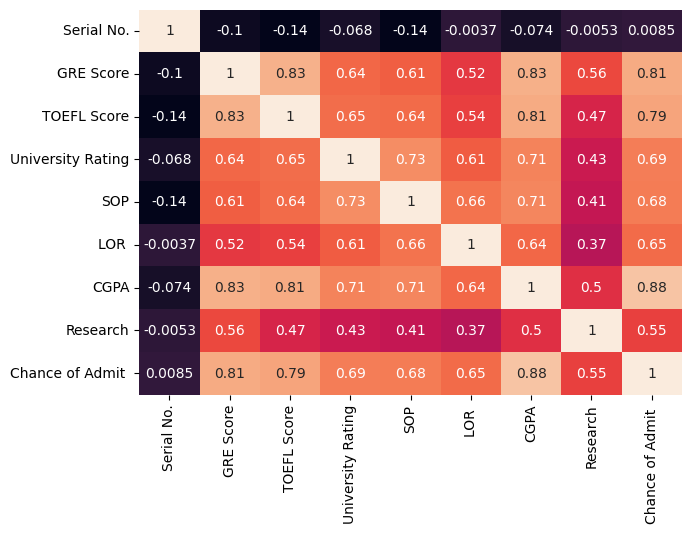

In [19]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cbar=False)
plt.show

**Q.2 Find out the minimum and maximum values for GRE score.**

In [20]:
## min_value
df['GRE Score'].min()

290

In [21]:
## max_value
df['GRE Score'].max()

340

**Q.3 Find out the percentage of universities for each university rating.**

In [22]:
df['University Rating'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

3    32.4%
2    25.2%
4    21.0%
5    14.6%
1     6.8%
Name: University Rating, dtype: object

**Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :**

Students having the “Chance of Admit” value > 0.80, are assigned value 1, and

Students having the “Chance of Admit” value < 0.80, are assigned value 0

Where 0: Low chance of Admission and 1: High chance of admission

In [27]:
df['Chance of Admit ']=np.where(df['Chance of Admit ']>=0.80,1,df['Chance of Admit '])
df['Chance of Admit ']=np.where(df['Chance of Admit ']<0.80,0,df['Chance of Admit '])

In [29]:
df['Chance of Admit '].value_counts()

0.0    345
1.0    155
Name: Chance of Admit , dtype: int64

**Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.**

In [47]:
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit '].values

In [48]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [180]:
## decision tree (model 1)
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini',max_depth=4)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [181]:
dtc.score(x_train,y_train)


0.94

In [182]:
dtc.score(x_test,y_test)

0.94

In [190]:
## model 2 after hyperparameter tunning
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit '].values

In [191]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [192]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [193]:
dtc.score(x_train,y_train)

0.9371428571428572

In [194]:
dtc.score(x_test,y_test)

0.9466666666666667

In [195]:
## model 3
x=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit '].values

In [215]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [216]:
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier(criterion='gini',max_depth=150)
model3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=150)

In [217]:
dtc.score(x_train,y_train)

0.9257142857142857

In [218]:
dtc.score(x_test,y_test)

0.9733333333333334